In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from datetime import datetime, timedelta

import json


sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

In [2]:
# Load the Datasets

traffic_train = pd.read_csv('../../datasets/training_data.csv', encoding='latin1')
traffic_test = pd.read_csv('../../datasets/test_data.csv', encoding='latin1')

In [3]:
# Dias de feriado no porto
pt_holidays = holidays.Portugal()

for df in [traffic_train, traffic_test]:
    df['record_date'] = pd.to_datetime(df['record_date'])
    df['is_holiday'] = df['record_date'].dt.date.map(lambda d: d in pt_holidays).astype(int)


In [4]:
eventos = {
  "eventos_porto_2018_2019": [
    {
      "nome": "Férias de Verão (2018 - Período de Redução)",
      "tipo": "Redução Sazonal",
      "data_inicio": "2018-07-24",
      "data_fim": "2018-08-31"
    },
    {
      "nome": "Feriados de Natal (2018/2019)",
      "tipo": "Férias Escolares/Comportamental",
      "data_inicio": "2018-12-17",
      "data_fim": "2019-01-04"
    },
    {
      "nome": "Carnaval (2019)",
      "tipo": "Feriado Móvel/Ponto Facultativo",
      "data_inicio": "2019-03-04",
      "data_fim": "2019-03-05"
    },
    {
      "nome": "Queima das Fitas (2019)",
      "tipo": "Evento de Massa",
      "data_inicio": "2019-05-05",
      "data_fim": "2019-05-12"
    },
    {
      "nome": "Férias da Páscoa (2019)",
      "tipo": "Férias Escolares/Religioso",
      "data_inicio": "2019-04-15",
      "data_fim": "2019-04-26"
    },
    {
      "nome": "São João (2019)",
      "tipo": "Feriado Municipal",
      "data_inicio": "2019-06-23",
      "data_fim": "2019-06-25"
    },
    {
      "nome": "Férias de Verão (2019 - Período de Redução)",
      "tipo": "Redução Sazonal",
      "data_inicio": "2019-07-15",
      "data_fim": "2019-08-31"
    }
  ]
}

def create_major_event_feature_from_json(traffic_dataframes, eventos_dict):
    major_dates_set = set()
    
    for evento in eventos_dict['eventos_porto_2018_2019']:
        start_dt = datetime.strptime(evento['data_inicio'], '%Y-%m-%d').date()
        end_dt = datetime.strptime(evento['data_fim'], '%Y-%m-%d').date()
        
        current_dt = start_dt
        while current_dt <= end_dt:
            major_dates_set.add(current_dt)
            current_dt += timedelta(days=1)
            
    for df in traffic_dataframes:
        df['record_date'] = pd.to_datetime(df['record_date'], errors='coerce')
        df['date'] = df['record_date'].dt.date
        
        df['is_major_event'] = df['date'].isin(major_dates_set).astype(int)
        
        df.drop(columns=['date'], inplace=True, errors='ignore')
        
    return traffic_dataframes

traffic_train_clean, traffic_test_clean = create_major_event_feature_from_json(
    [traffic_train, traffic_test],
    eventos 
)

traffic_train_clean.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,is_holiday,is_major_event
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN,0,1
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN,0,1
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN,0,0
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN,0,0
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN,0,0


In [5]:
traffic_train.columns

Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN',
       'is_holiday', 'is_major_event'],
      dtype='object')

In [6]:
# Jogos no Estádio do Dragão época 2018-2019
eventos_porto = {
    "jogos_dragao_2018_2019": [
        {"nome": "Porto vs Chaves", "tipo": "Jogo Futebol", "data": "2018-08-11"},
        {"nome": "Porto vs Vitória Guimarães", "tipo": "Jogo Futebol", "data": "2018-08-25"},
        {"nome": "Porto vs Moreirense", "tipo": "Jogo Futebol", "data": "2018-09-02"},
        {"nome": "Porto vs Tondela", "tipo": "Jogo Futebol", "data": "2018-09-28"},
        {"nome": "Porto vs Feirense", "tipo": "Jogo Futebol", "data": "2018-10-28"},
        {"nome": "Porto vs Braga", "tipo": "Jogo Futebol", "data": "2018-11-10"},
        {"nome": "Porto vs Portimonense", "tipo": "Jogo Futebol", "data": "2018-12-07"},
        {"nome": "Porto vs Rio Ave", "tipo": "Jogo Futebol", "data": "2018-12-23"},
        {"nome": "Porto vs Nacional", "tipo": "Jogo Futebol", "data": "2019-01-07"},
        {"nome": "Porto vs B‑SAD", "tipo": "Jogo Futebol", "data": "2019-01-30"},
        {"nome": "Porto vs Benfica", "tipo": "Jogo Futebol", "data": "2018-03-02"},                                                                       
        {"nome": "Porto vs Vitória Setúbal", "tipo": "Jogo Futebol", "data": "2019-02-16"},
        {"nome": "Porto vs Marítimo", "tipo": "Jogo Futebol", "data": "2019-03-16"},
        {"nome": "Porto vs Boavista", "tipo": "Jogo Futebol", "data": "2019-04-05"},
        {"nome": "Porto vs Santa Clara", "tipo": "Jogo Futebol", "data": "2019-04-20"},
        {"nome": "Porto vs Aves", "tipo": "Jogo Futebol", "data": "2019-05-04"},
        {"nome": "Porto vs Sporting CP", "tipo": "Jogo Futebol", "data": "2019-05-18"},
        {"nome": "Porto vs Galatasaray", "tipo": "Champions", "data": "2018-10-03"},
        {"nome": "Porto vs Lokomotiv Moscovo", "tipo": "Champions", "data": "2018-11-06"},
        {"nome": "Porto vs Schalke 04", "tipo": "Champions", "data": "2018-11-28"}
    ]
}

In [7]:
# Marcar os Jogos no Estádio do Dragão
def create_porto_jogos_event(dfs,jogos_dict):
    jogos_date = set()
    for jogo in jogos_dict["jogos_dragao_2018_2019"]:
        dt = datetime.strptime(jogo['data'], '%Y-%m-%d').date()
        jogos_date.add(dt)
    for df in dfs:
        df['record_date'] = pd.to_datetime(df['record_date'], errors='coerce')
        df['date'] = df['record_date'].dt.date
        df['is_fcporto_home_game'] = df['date'].isin(jogos_date).astype(int)
        df.drop(columns=['date'], inplace=True, errors='ignore')
    return dfs

traffic_train_clean, traffic_test_clean = create_porto_jogos_event(
    [traffic_train, traffic_test],
    eventos_porto 
)
traffic_train_clean.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,is_holiday,is_major_event,is_fcporto_home_game
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN,0,1,0
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN,0,1,0
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN,0,0,0
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN,0,0,0
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN,0,0,0


In [11]:
for df in [traffic_train, traffic_test]:
    df['record_date'] = pd.to_datetime(df['record_date'])
    df['hour'] = df['record_date'].dt.hour
    df['day_of_week'] = df['record_date'].dt.dayofweek
    df['month'] = df['record_date'].dt.month

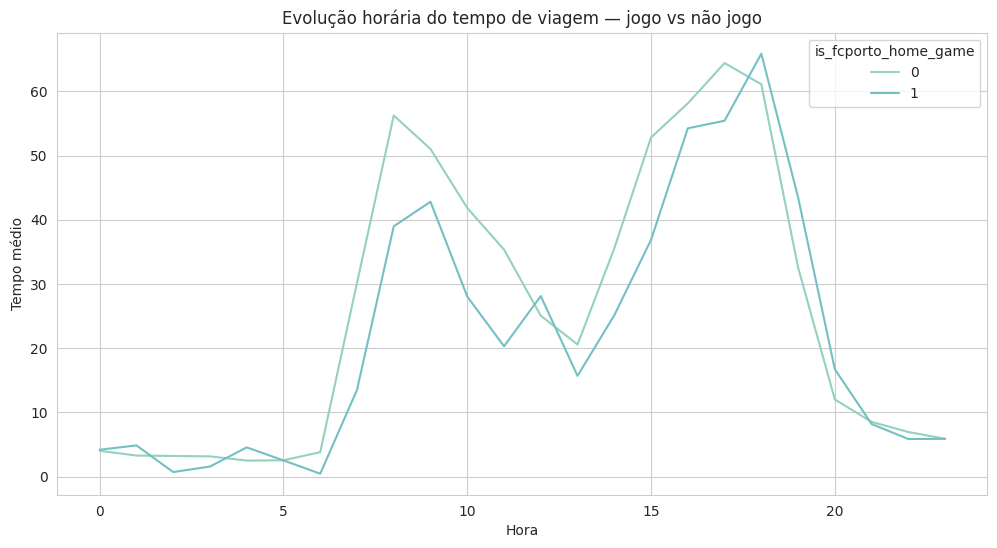

In [12]:
traffic_train.groupby(['is_fcporto_home_game', 'hour'])['AVERAGE_TIME_DIFF'].mean().unstack().T.plot(figsize=(12,6))
plt.title("Evolução horária do tempo de viagem — jogo vs não jogo")
plt.xlabel("Hora")
plt.ylabel("Tempo médio")
plt.show()